

#Pytorch Workflow

covering: 
1. data (prepare and load)
2. build model
3. fitting the model to data(training)
4. making predictions and avealuating a model (inference)
5. saving adn loading  a model
6. putting it all together



In [1]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt


#check pytorch version
torch.__version__

'1.13.1+cu116'

## 1. Data(preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (like youtube)
* Audio like songs and podcasts
* DNA
* Text

Machine learning is a game of two parts
1. get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase thus, lets create some *known* data using the linear regression formula

We'll use a linera regression formula to make a straight line with known **parameters**

In [2]:
#Create *known* paramenters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

###Splitting data into training and test sets (one of the most imprtant concepts in machine learning in general)

create a training and test set with our data

In [4]:
#create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize the data?

this is where the data explorer's motto comes in!
"Visualize, visualize, visualize"

In [5]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels = y_test, predictions= None):
  """
  Plots trainig data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size": 14});

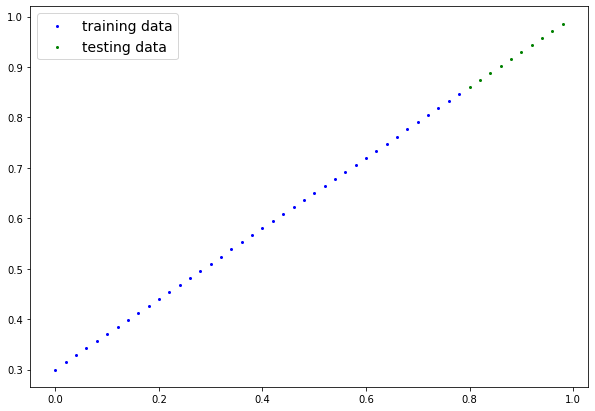

In [6]:
plot_predictions();

##2. Building model

Fist PyTorch mdoel!

what the model does:
* Start with random value (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) tjhe ideal values( the weight and bias values we used to create the data.

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [7]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # can this paramenter be updated via gradient descent?
                                            dtype=torch.float)) # PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1, # start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # can this paramenter be updated bia gradfient descent?
                                         dtype=torch.float)) 


  #Forward mehtod to define the computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula



### Pytorch model building essentials

* `torch.nn` - contains all the building blocks for cmputational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter`- what aprameters should our model try and learn , often a pytorch layer from torch.nn will set these for us
* `torch.nn.Module` - the base class for all neural network modules, if you subclass it, you should override forward()
* `torch.optim` - this is where the optimizers in pytorch live, they will help with gradient descent
* `def forward()` - All nn.Module subcalsses require you to override forward(), this method defines what happens in forward computation.

#checking the contents of our pytorch mdoel

now we've created a model.

so we can check our model parameters or whtas inside the model using `.paramenters()`

In [8]:
#Cretae a random seed
torch.manual_seed(42)

#create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
#List  named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias

(0.7, 0.3)

###Making Predictions using `torch.inference_mode()`

To check our model's predictive power, lets see hopw well it predicts `y_test`. based on `X_test`

When we pass data through our model, its goin to run it through the `forward()` method.



In [11]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
#Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

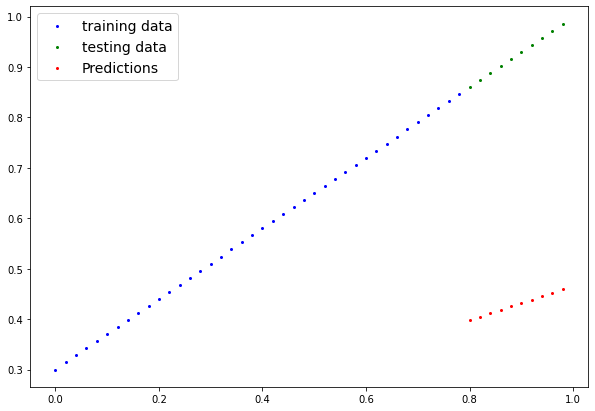

In [14]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a. model to move from some unknown parametes to some known parameters

or in other words from a poor representation of the data to a bteter representation of the data.

one way to measure how poor or how wrong your models predictions are is to use loss functions.

* Note: Loss function may also be called cost fnction or criterion in deffferent areas. for our case, we're going to refer it to as a loss function.

Things we need to train:

* **Loss function:** a function to measure how wrong the models predictions are to the ideal output, lower is better.
* **Optimizer:** Takes into account of the loss of the model and adjusts the model's parameters (eg wights and bias) in our case to improve the loss function.

And specifically for pytorch, we need:
* A training loop
* A testing loop

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# Chekc out how model's parameters (a parameter is a value taht the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Ssetup an optimizer(stocastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)# lr = learning rate = possibly the most important hyperparameter you can set.

##Q: Which loss fucntion and optimizer should i use?

A: this will be problem specific. But with exp, you'll get an idea of what works and what doesnt with your particular problem set.

For eg, for a regression problem(like ours), a loss function of nn.L1Loss() and optimizer like torch.optim.SGD() will suffice

But for a classification problem like classifying whether a photo is a dog or a cat, you'll likely want to use a loss function of nn.BCELoss() (binary cross entropy)

### Building a training loop ( and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` funcitons) to make predictions on data - also called forward propagation
2. Calculate the loss ( compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the  (**backpropagation**)
5. Optimizer step - use the optimizer to adjust the model's paramters to try and improve the loss.(**gradient descent**)




In [18]:
torch.manual_seed(42)

# An epoch is. one loop through the data...( this is a hyperparameter because we set it ourselves)
epochs = 200

#Track different values
epoch_count = []
loss_values = []
test_loss_values = []

###Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to minimmize
  
  # 1. Forward. pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimzier changes will accumulate throughtthe loop so...we have to zero them above in step3 for the next iteration of the loop

  # testing
  model_0.eval() # truns off differnt settings in the mdoel not needed for evaluating/testing (dropout/batchnorm)
  with torch.inference_mode(): # Turns off gradient tracking & a couple more things behind the scnes
 #with torch.no_grad(): # may aslo see torch.no_grad() in older pyTorch code  
     # 1. Do the forward pass
     test_pred = model_0(X_test)

     # 2. Cal the loss
     test_loss = loss_fn(test_pred, y_test)

  #print whats happening
  if epoch % 10 == 0:
     epoch_count.append(epoch)
     loss_values.append(loss)
     test_loss_values.append(test_loss)
     print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
     # Print out model state_dict()
     print(model_0.state_dict())

  


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [19]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

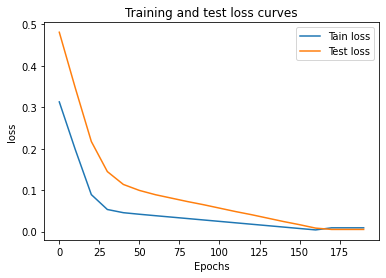

In [20]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Tain loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()

In [21]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
weight, bias

(0.7, 0.3)

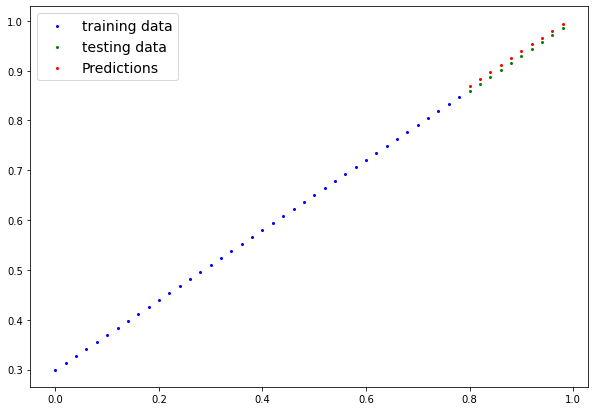

In [24]:
plot_predictions(predictions=y_preds_new);

###Saving a model in PyTorch

There are three main methods to know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save PyTorch Object in python's pickle format
2. `torch.load()` - allows you to load a pytorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

In [25]:
# Saving our pytorch model
from pathlib import Path

# 1.Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"saving a model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


saving a model to: models/01_pytorch_workflow_model_0.pth


###Loading a Pytorch model

since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of out model class and load the saved `state_dict()` into that

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
# To load in a saved state_dict we have to instantiate a new isntance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this wiwll update the new isntance with the updates parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [30]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [31]:
#Compare loaded model preds with oroginal model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6 .Putting it all together

Lets go back through the steps and see it all in one place

In [32]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt


#Check pytorch version
torch.__version__

'1.13.1+cu116'

Create device-agnostic code.

This means if we got access to a GPU, our code with use it, for potentially faster computing.

if no gpu is available, the code will default to using CPU.

In [33]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


###Data

In [36]:
# Create some data using the linear regression formula of y= weight * X + b
weight = 0.7
bias = 0.3

#Create range values
start = 0
end = 1
step = 0.02

#create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

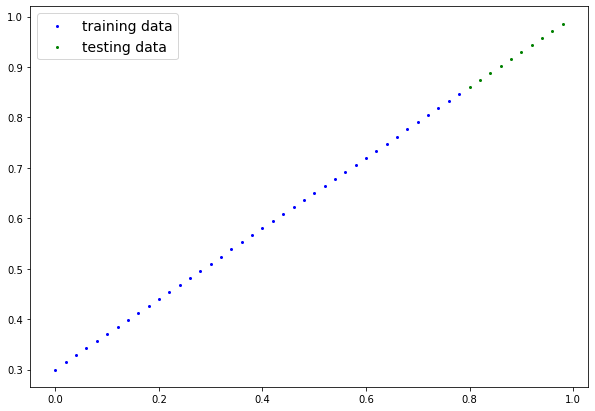

In [38]:
#Plot the data
#note: if you dont have plot_predictions() functioon laoded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.3 Building a Pytorch Linear Model

In [43]:
#Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Liner() for creating th emodel parameters / also called: linear transform, probing layer, fully connceted layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#Set the maual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [41]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [44]:
# Check the mdoel current device
next(model_1.parameters()).device

device(type='cpu')

In [45]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

for training we nee:
* Loss fucntion
* Optimizer
* Training loop
* Testing loop

In [46]:
# Setup the loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optmizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, )

In [49]:
# Write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Cal the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer to zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #Print whats happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | test loss: 0.013801801018416

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [51]:
weight, bias

(0.7, 0.3)

### 6.4 making and evaluating predictions

In [52]:
# turn the model into eval mdoe
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

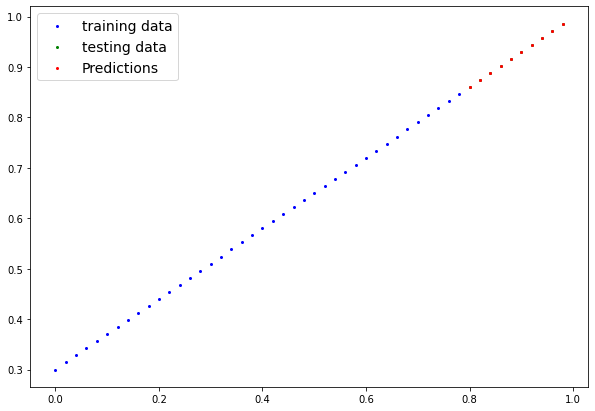

In [54]:
# Check the predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 saving and laoding a trained model

In [59]:
from pathlib import Path

# 1. Create models directory
MDOEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 3. Create a model save path
MODEL_NAME = "_01_pytorch_workfloww_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/_01_pytorch_workfloww_model_1.pth


In [60]:
# Load a model

#Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the laoded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [61]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [62]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [63]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')